# Allen Institute
## 06_factor_analysis_gw9
---
### Dataset
- `../data/gse165388_processed/gw9_log.mtx`

1. Data Viz
2. Factor Analysis

In [1]:
import os
import json
from typing import NamedTuple, Dict, Union

import factor_analyzer as fa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm.notebook import tqdm

from tools.factor_analysis import kmo_viz, parallel_analysis, plot_parallel_analysis, FactorAnalyzer
from tools.figure import boxplot, cns_subtype_markers, custom_bwr, fig_kwarg, pcp
from tools.r import read_json
from tools.sklearn_wrapper import KMeansClustering
import tools.spongy_panda as spd

In [2]:
feat_dict = read_json("../data/gse165388_processed/gw9_log.json", from_r=True)

custom_feat = [
    "SLC1A2", "VIM", "GFAP",
    
    "OLIG2", "CNP", "PDGFRA",
    
    "AIF1", "SPP1",
    
    "TBR1", "SOX5", "DCX", "TUBB3",
    
    "NR2F1",
    
    "NEUROD1", "NEUROD6", "GRIN2B",
    
    "ISL1", "EBF1",
    
    "MAF", "SOX6", "ERBB4",
    
    "HES1", "FABP7", "DLX2", "ASCL1",
    
    "NES", "SOX1", "SOX2"
]

In [4]:
feat = [v for v in cns_subtype_markers if v in feat_dict["index"]]

In [5]:
class Config(NamedTuple):
    data: pd.core.frame.DataFrame = spd.load_mtx(
        "../data/gse165388_processed/gw9_log.mtx",
        "../data/gse165388_processed/gw9_log.json",
        from_r = True
    ).loc[:, feat].to_df()
    save_dir: str = "../out/m1_10x/06_fa"
    fig_kwarg: Dict[str, Union[str, int, float]] = fig_kwarg
    save_file: bool = False

In [6]:
conf = Config()

---
## Data Visualization
- heatmap
- kmo
- histogram

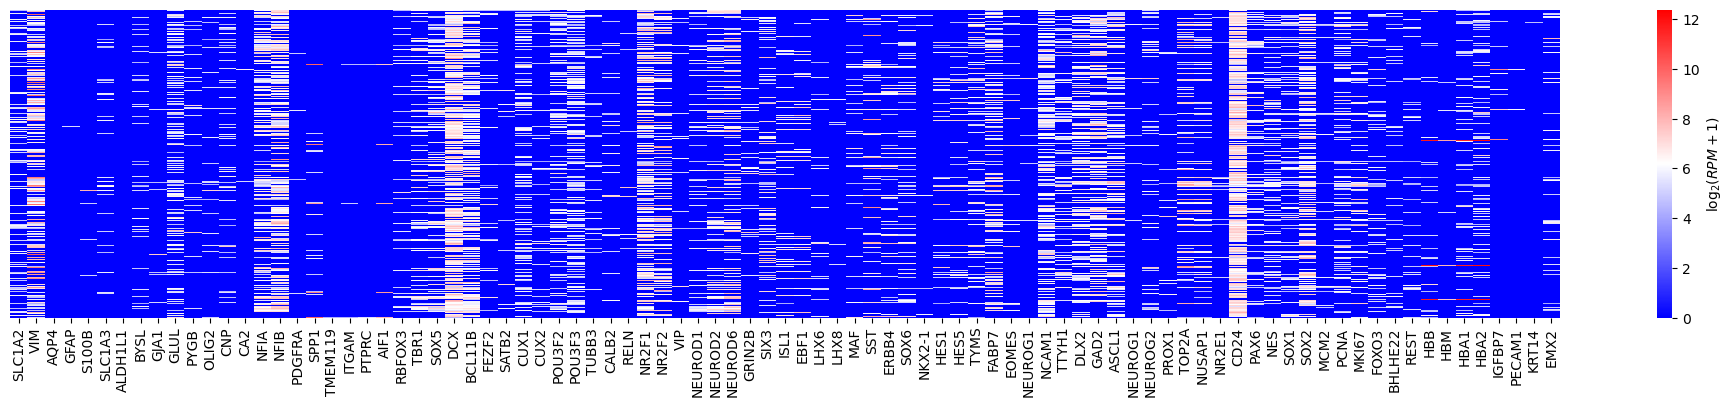

In [9]:
fig, ax = plt.subplots(figsize=(25, 4))
sns.heatmap(
    conf.data, ax=ax, cmap="bwr",
    vmax=conf.data.max().max(),
    vmin=conf.data.min().min(),
    yticklabels=False
)
ax.set(ylabel="")
ax.collections[0].colorbar.set_label("$\log_2(RPM+1)$");

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/heatmap.png", **conf.fig_kwarg)

In [10]:
data = conf.data.loc[:, conf.data.columns[conf.data.max() > 0]]

/opt/conda/lib/python3.10/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


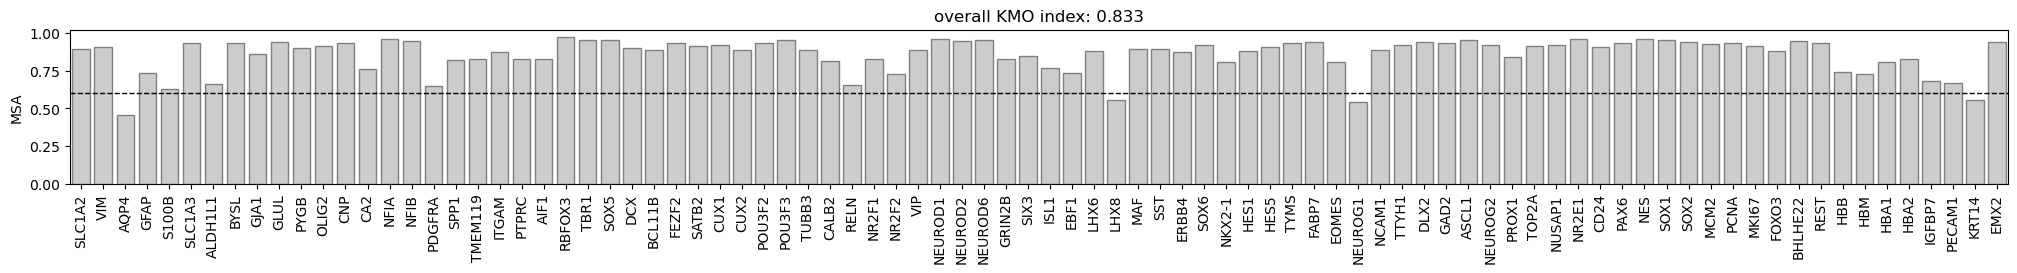

In [11]:
fig, ax = plt.subplots(figsize=(25, 2))

kmo_viz(data, ax=ax, line=True, landscape=True, **{"color": ".8"})

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/kmo.png", **conf.fig_kwarg)

In [12]:
conf = Config(
    data=data.T[fa.calculate_kmo(data)[0] > 0.6].T,
    save_file=conf.save_file
)

/opt/conda/lib/python3.10/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


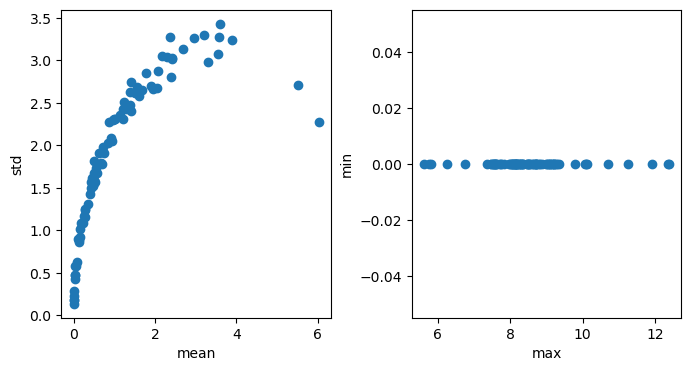

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3)

ax[0].scatter(conf.data.mean(), conf.data.std())
ax[0].set(xlabel="mean", ylabel="std")

ax[1].scatter(conf.data.max(), conf.data.min())
ax[1].set(xlabel="max", ylabel="min");

- rescaling might not essential

---
## Factor Analysis
- parallel analysis
- factor analysis
- clustering

### Parallel Analysis

In [14]:
n_f = parallel_analysis(
    conf.data,
    random_state=0,
    nullmodel="perm",
    use_smc=True
)

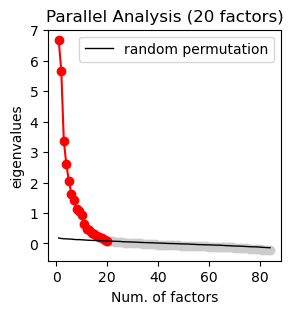

In [15]:
fig, ax = plt.subplots(figsize=(3, 3))

plot_parallel_analysis(
    conf.data,
    random_state=0,
    nullmodel="perm",
    use_smc=True,
    ax=ax
)

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/pa.png", **conf.fig_kwarg)

### Factor Analysis
- quartimin rotation
- varimax rotation

In [16]:
rot, method = "quartimin", "ml"

In [17]:
model_fa = FactorAnalyzer(n_f, conf.data)

model_fa.rotate(rot, method)

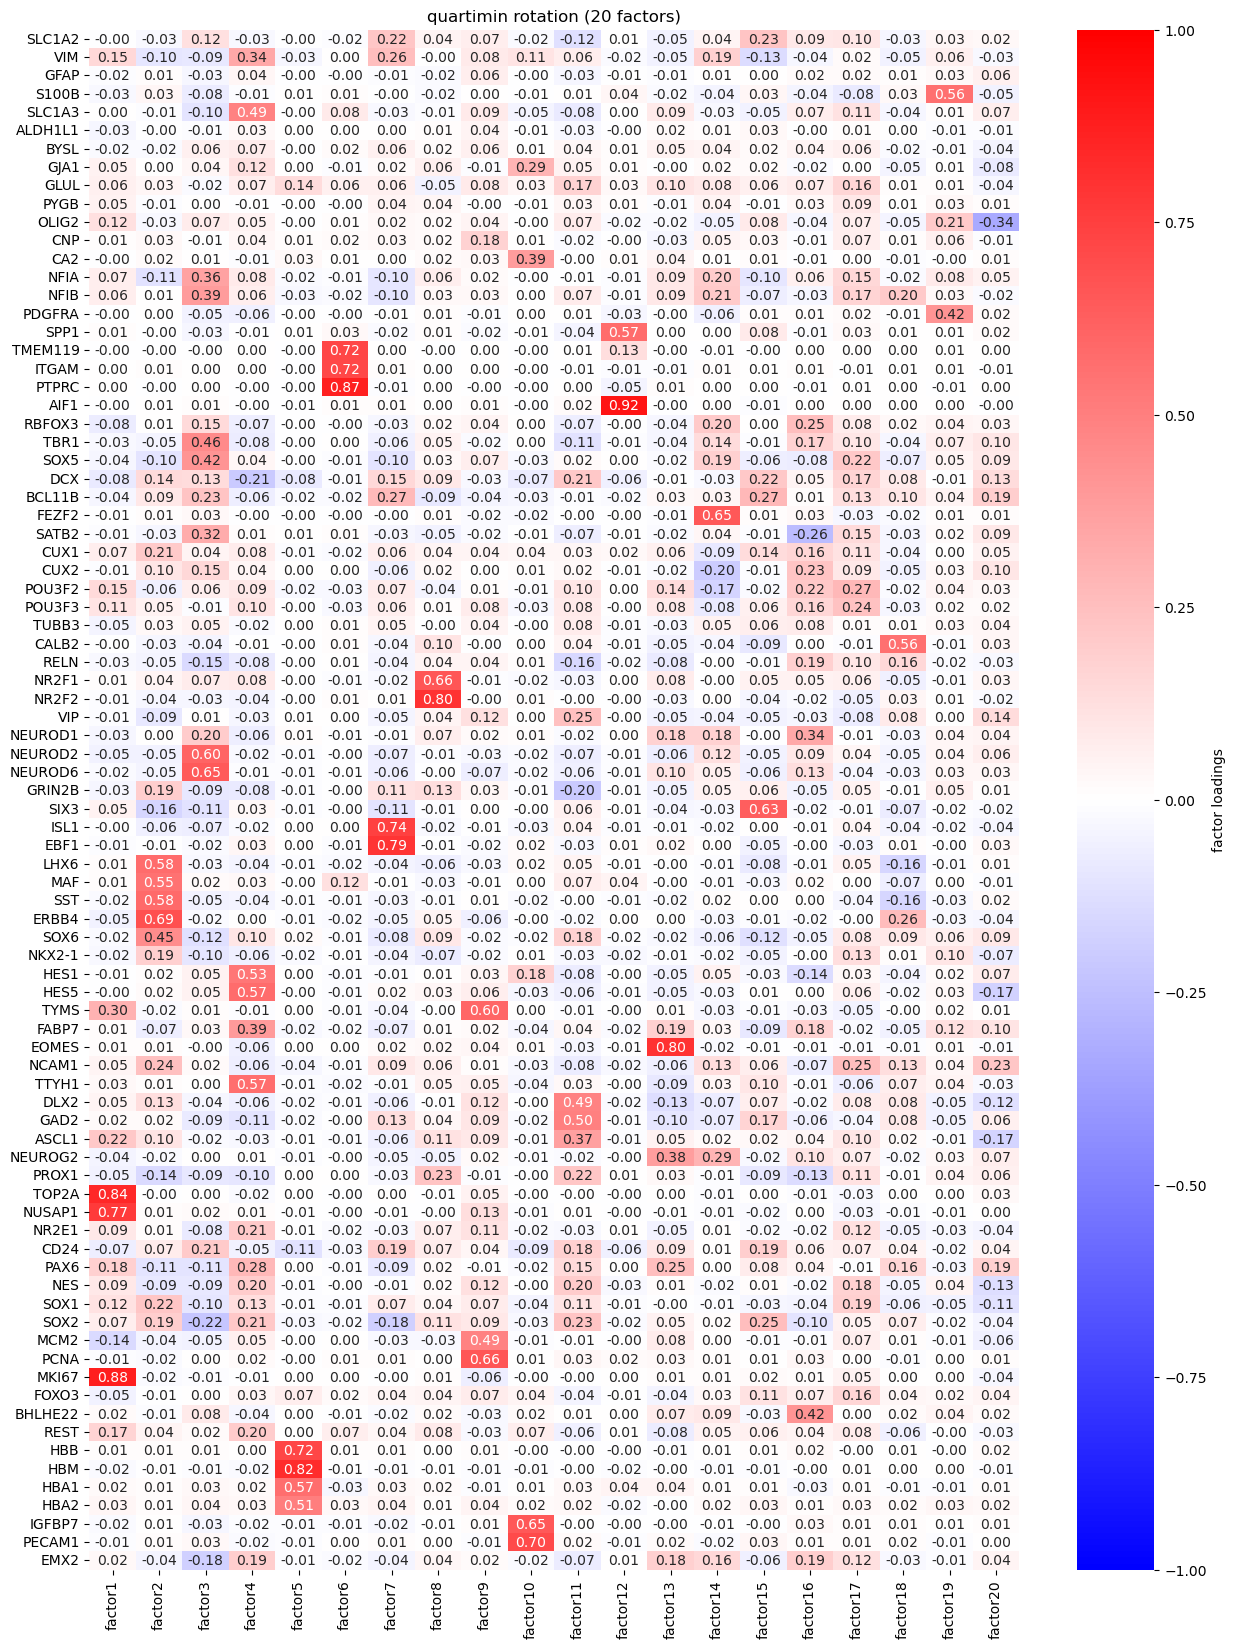

In [27]:
fig, ax = plt.subplots(figsize=(15, 20))

model_fa.heatmap(ax)
ax.set(title=f"{rot} rotation ({n_f} factors)")

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/factors_{rot}_{n_f}.png", **conf.fig_kwarg)

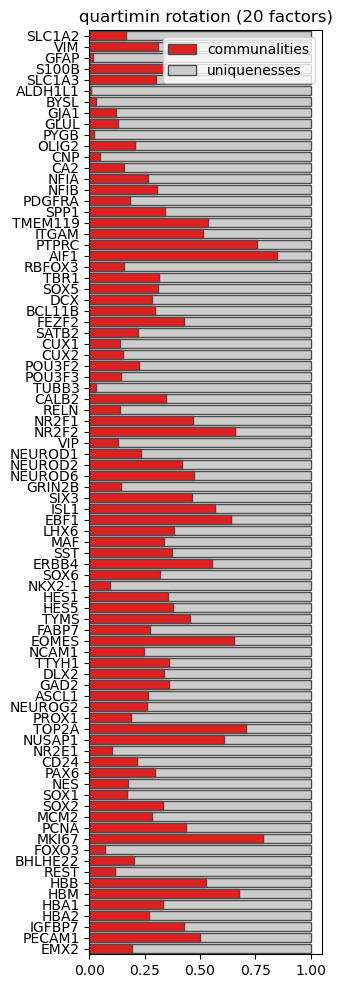

In [26]:
fig, ax = plt.subplots(figsize=(3, 12))

model_fa.plot_var(ax)
ax.set(title=f"{rot} rotation ({n_f} factors)")

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/com_uni_{rot}_{n_f}.png", **conf.fig_kwarg)

- varimax rotation

In [28]:
rot = "varimax"

In [29]:
model_fa.rotate(rot, method)

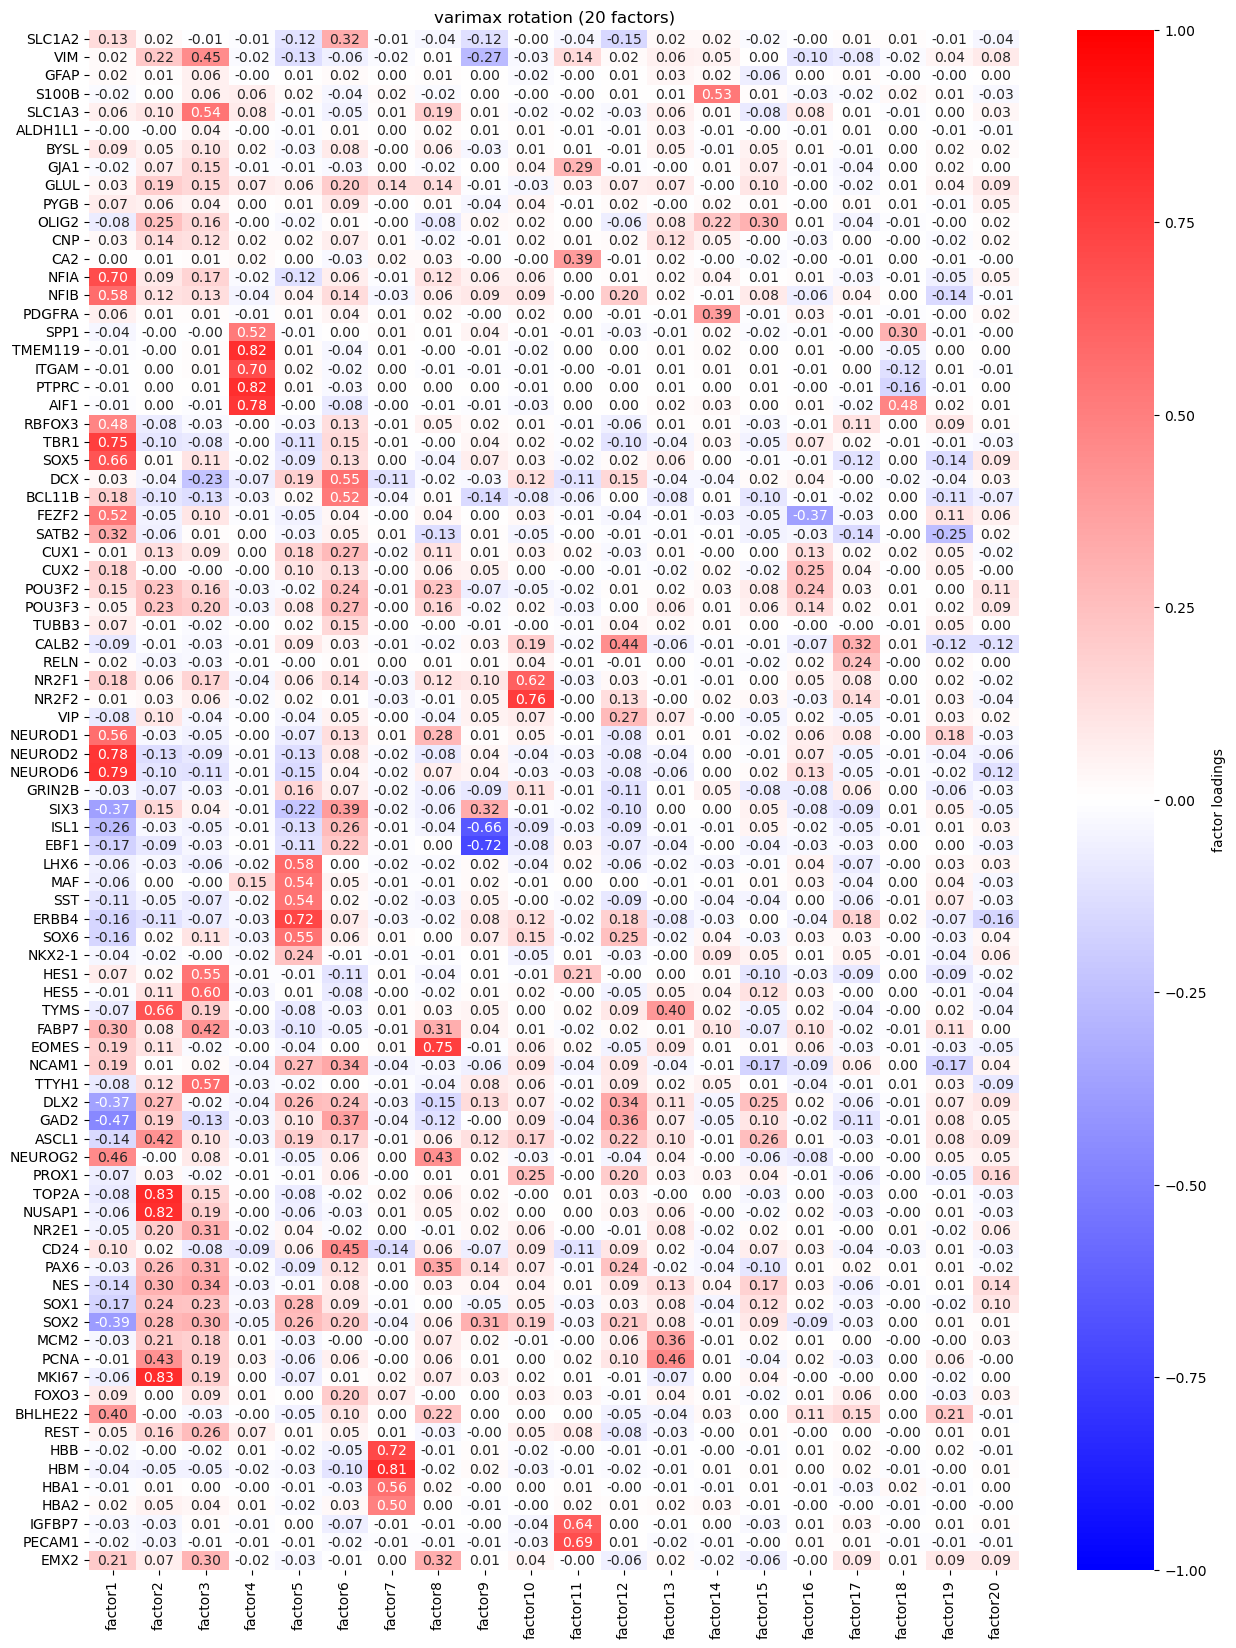

In [30]:
fig, ax = plt.subplots(figsize=(15, 20))

model_fa.heatmap(ax)
ax.set(title=f"{rot} rotation ({n_f} factors)")

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/factors_{rot}_{n_f}.png", **conf.fig_kwarg)